In [1]:
cd ..


C:\Users\Fatma\Desktop\Projets\optibrain


In [20]:
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
from sklearn.datasets import load_breast_cancer

In [21]:
X, y = load_breast_cancer(return_X_y=True)

In [15]:
import pandas as pd

In [29]:
X = pd.DataFrame(X)

In [24]:
y = pd.DataFrame(y)

In [26]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [34]:
from optibrain import SurrogateModeling

In [35]:
srgm = SurrogateModeling(['catboost','xgboost','lgbm'], 'classification') 

In [36]:
srgm.get_best_model(X_train, y_train)

C:\Users\Fatma\Desktop\Projets\optibrain\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [37]:
srgm.model

In [38]:
srgm.get_estimators_performances

catboost    0.829726
lgbm        0.716548
xgboost         -inf
dtype: float64

In [39]:
y_pred = srgm.model.predict(X_test)


In [41]:
y_pred = pd.DataFrame(y_pred)

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

def plot_predictions_classification(y_true, y_pred):
    """
    Affiche les résultats des prédictions pour la régression ou la classification.
    
    :param y_true: Valeurs réelles
    :param y_pred: Valeurs prédites
    """
    if isinstance(y_true, pd.DataFrame) or isinstance(y_true, pd.Series):
        y_true = y_true.values
    if isinstance(y_pred, pd.DataFrame) or isinstance(y_pred, pd.Series):
        y_pred = y_pred.values
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Matrice de confusion")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


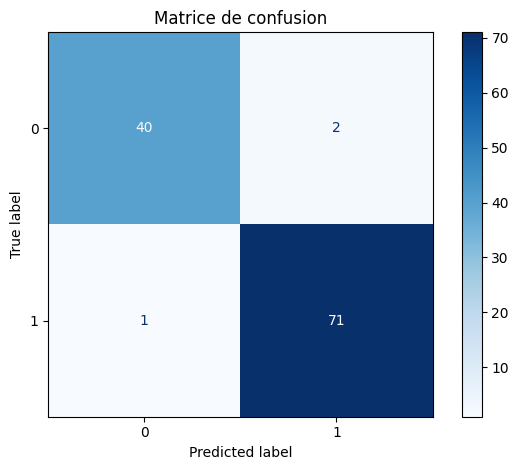

In [46]:
plot_predictions_classification(y_test, y_pred)